In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings (if desired)


In [2]:
df = pd.read_csv('featured_car_data.csv')

In [3]:
df.head(3)

,price,odometer,state,lat,long,Odometer_Price_Ratio,Man_dep_OP,condition_excellent,condition_fair,condition_good,...,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_freq,manufacturer_freq,paint_color_freq,car_age_freq,cylinders_freq
0,15000,128000,al,32.592,-85.5189,8.533333,29.615648,1,0,0,...,0,0,0,0,1,0.123949,0.172124,0.182027,0.070794,0.359397
1,27990,68696,al,32.590,-85.4800,2.454305,23.946223,0,0,1,...,0,1,1,0,0,0.083903,0.036473,0.182027,0.063972,0.272611
2,34590,29499,al,32.590,-85.4800,0.852819,29.450105,0,0,1,...,0,1,1,0,0,0.083903,0.139323,0.151546,0.047726,0.359397


In [4]:
df.head(10)

,price,odometer,state,lat,long,Odometer_Price_Ratio,Man_dep_OP,condition_excellent,condition_fair,condition_good,...,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_freq,manufacturer_freq,paint_color_freq,car_age_freq,cylinders_freq
0,15000,128000,al,32.5920,-85.518900,8.533333,29.615648,1,0,0,...,0,0,0,0,1,0.123949,0.172124,0.182027,0.070794,0.359397
1,27990,68696,al,32.5900,-85.480000,2.454305,23.946223,0,0,1,...,0,1,1,0,0,0.083903,0.036473,0.182027,0.063972,0.272611
2,34590,29499,al,32.5900,-85.480000,0.852819,29.450105,0,0,1,...,0,1,1,0,0,0.083903,0.139323,0.151546,0.047726,0.359397
3,35000,43000,al,32.6013,-85.443974,1.228571,31.878118,1,0,0,...,0,0,1,0,0,0.123949,0.091555,0.120798,0.023982,0.359397
4,29990,17302,al,32.5900,-85.480000,0.576926,29.450105,0,0,1,...,0,1,1,0,0,0.083903,0.139323,0.103131,0.047726,0.359397
5,38590,30237,al,32.5900,-85.480000,0.783545,29.450105,0,0,1,...,0,1,0,0,1,0.012237,0.139323,0.103131,0.060216,0.272611
6,32990,30041,al,32.5900,-85.480000,0.910609,26.389779,0,0,1,...,0,1,1,0,0,0.012237,0.045672,0.151546,0.045658,0.359397
7,37990,9704,al,32.5900,-85.480000,0.255436,29.450105,0,0,1,...,0,1,0,0,1,0.063268,0.139323,0.103131,0.047726,0.272611
8,27990,37332,al,32.5900,-85.480000,1.333762,28.393882,0,0,1,...,0,1,1,0,0,0.083903,0.052944,0.151546,0.035601,0.359397
9,19900,88000,al,32.5475,-85.468200,4.422111,29.615648,0,0,1,...,0,0,1,0,0,0.083903,0.172124,0.111964,0.034757,0.272611


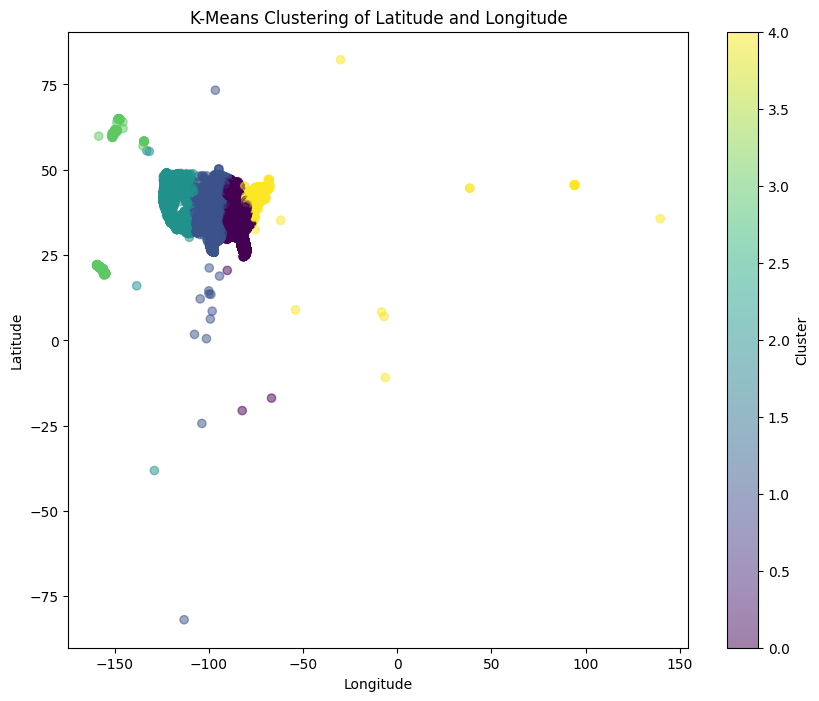

Cluster Centers:
Cluster 1: Latitude = -84.13358651678428, Longitude = 36.596822927175545
Cluster 2: Latitude = -97.61107082940455, Longitude = 37.95601634289412
Cluster 3: Latitude = -118.41359075078051, Longitude = 39.17245258142874
Cluster 4: Latitude = -153.0578216210937, Longitude = 43.2124146171875
Cluster 5: Latitude = -74.4950847380729, Longitude = 41.16385785499906


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the features for clustering (lat and long)
X = df[['lat', 'long']]
# Defining the number of clusters (k)
k = 5  # k value can be adjusted this number based on our requirements
# Initializing the KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
# Fitting the model to the data (latitude and longitude)
kmeans.fit(X)
# Addinging cluster labels to the DataFrame
df['cluster'] = kmeans.labels_
# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()
# Displaying the cluster centers (centroid coordinates)
print("Cluster Centers:")
for idx, center in enumerate(kmeans.cluster_centers_, start=1):
    print(f"Cluster {idx}: Latitude = {center[1]}, Longitude = {center[0]}")
# Exporting the Updatingd DataFrame with cluster labels to a CSV file
df.to_csv('ML_with_clusters.csv', index=False)



In [6]:
import pandas as pd
from sklearn.cluster import KMeans
data = df
# Selecting latitude and longitude features
lat_long_data = data[["lat", "long"]]
# Defining the number of clusters (k)
# You can experiment with different values of k to find the optimal number of clusters for our data
k = 5
# Performing K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(lat_long_data)
# Addinging a new column "cluster" to the data with cluster labels for each data point
data["cluster"] = kmeans.labels_




In [7]:
import pandas as pd
from sklearn.cluster import KMeans

# Select latitude and longitude features
lat_long_data = data[["lat", "long"]]

# Define the number of clusters (choose based on our data and needs)
num_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(lat_long_data)

# Adding the cluster labels as a new column named "cluster"
data["cluster"] = kmeans.labels_

# Save the updated data as a new CSV file
data.to_csv("ML_with_clusters.csv", index=False)

print("K-means clustering complete! The updated dataset with cluster labels is saved as 'ML_with_clusters.csv'")


K-means clustering complete! The updated dataset with cluster labels is saved as 'ML_with_clusters.csv'


In [8]:
import pandas as pd

# Load our data from CSV (assuming it's named "data.csv")
data = pd.read_csv("ML_with_clusters.csv")
# Group data by cluster
cluster_groups = data.groupby("cluster")
# Loop through each cluster and save data to a separate CSV file
for cluster, cluster_data in cluster_groups:
  filename = f"cluster_{cluster}.csv"
  cluster_data.to_csv(filename, index=False)
print("CSV files for each cluster Creatingd successfully!")


CSV files for each cluster Creatingd successfully!


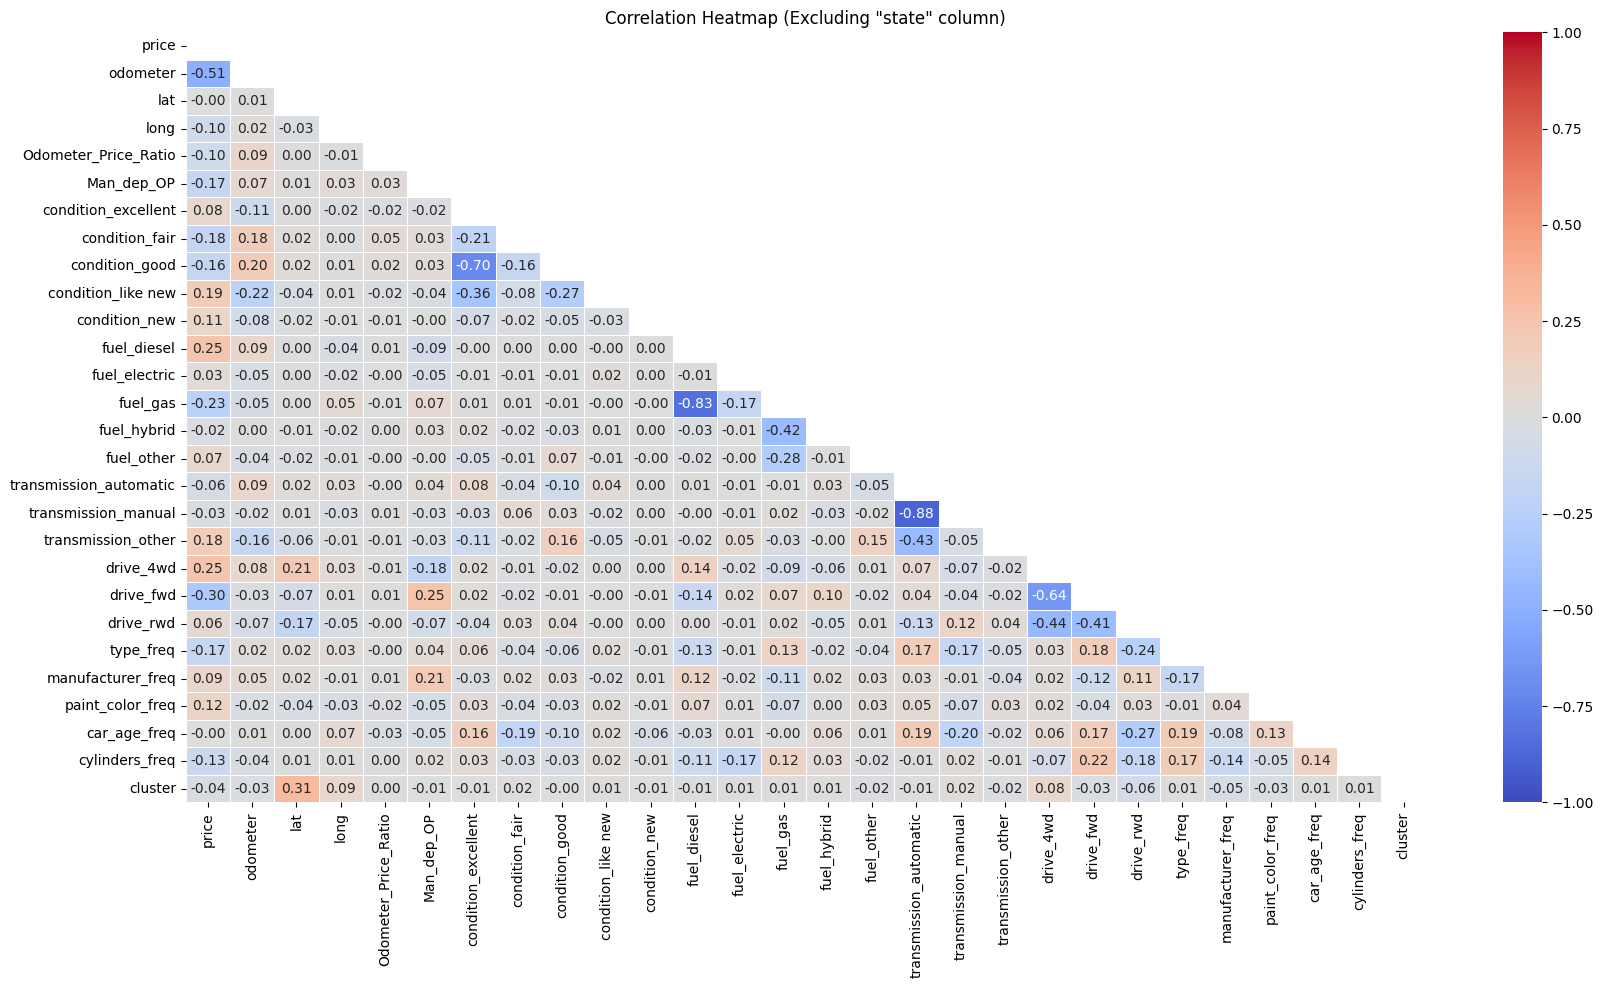

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Exclude 'state' column from the dataframe
df_without_state = df.drop(columns=['state'])

# Normalize the data to z-scores
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_state), columns=df_without_state.columns)

# Calculate the correlation matrix
corr_matrix = df_scaled.corr()

# Creating a mask for the upper triangle (to display only the lower triangle)
mask = ~np.tri(corr_matrix.shape[0], k=-1, dtype=bool)

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', center=0, 
            vmin=-1, vmax=1, linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Heatmap (Excluding "state" column)')
plt.show()


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Assuming a classification task

# Import libraries for visualization (replace with our preferred ones)
import matplotlib.pyplot as plt
import seaborn as sns  # For biplot


In [11]:
# Check for missing values (handle if necessary)
print(df_without_state.isnull().sum())

# Scale data (assuming numerical features)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_state), columns=df_without_state.columns)


price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
Man_dep_OP                0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


In [12]:
# Analyze the scree plot to decide on the number of components (e.g., using the elbow method)
# Replace 'n_components' with our chosen number based on the scree plot
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

In [13]:
pca = PCA()
principal_components = pca.fit_transform(df_scaled)
explained_variances = pca.explained_variance_ratio_
num_components = len(explained_variances)

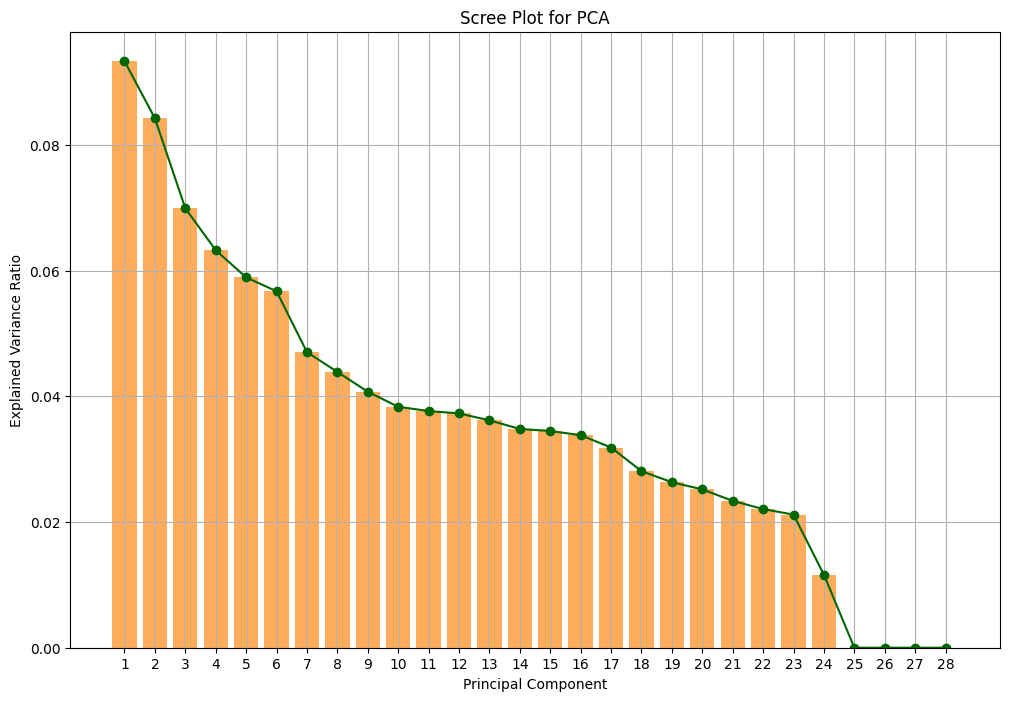

In [14]:

plt.figure(figsize=(12, 8))
plt.bar(np.arange(1, num_components + 1), explained_variances, color='#FF9933', alpha=0.8)
plt.plot(np.arange(1, num_components + 1), explained_variances, marker='o', linestyle='-', color='#006600')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, num_components + 1))
plt.grid(True)
plt.show()


In [15]:
df.columns

Index(['price', 'odometer', 'state', 'lat', 'long', 'Odometer_Price_Ratio',
       'Man_dep_OP', 'condition_excellent', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_new', 'fuel_diesel', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd',
       'drive_rwd', 'type_freq', 'manufacturer_freq', 'paint_color_freq',
       'car_age_freq', 'cylinders_freq', 'cluster'],
      dtype='object')

In [16]:
#Train ,TEST Split
x = df.drop(columns=["price","lat","long","cluster","state","Odometer_Price_Ratio"])
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
x.columns

Index(['odometer', 'Man_dep_OP', 'condition_excellent', 'condition_fair',
       'condition_good', 'condition_like new', 'condition_new', 'fuel_diesel',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'transmission_automatic', 'transmission_manual', 'transmission_other',
       'drive_4wd', 'drive_fwd', 'drive_rwd', 'type_freq', 'manufacturer_freq',
       'paint_color_freq', 'car_age_freq', 'cylinders_freq'],
      dtype='object')

In [18]:
training_r2_score = []
testing_r2_score = []
training_RMSE_score = []
testing_RMSE_score = []

In [19]:
import matplotlib.pyplot as plt

def model_prediction1(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    
    # Calculate R2 scores
    r2train = r2_score(y_train, x_train_pred) * 100
    r2test = r2_score(y_test, x_test_pred) * 100
    
    # Calculate RMSE scores
    msetrain = mean_squared_error(y_train, x_train_pred)
    rmstrain = np.sqrt(msetrain)
    msetest = mean_squared_error(y_test, x_test_pred)
    rmstest = np.sqrt(msetest)
    
    # Append scores to lists
    training_r2_score.append(r2train)
    testing_r2_score.append(r2test)
    training_RMSE_score.append(rmstrain)
    testing_RMSE_score.append(rmstest)
    
    # Print scores
    print(f"R2 Score of {model} model on training data: {r2train}")
    print(f"R2 Score of {model} model on testing data: {r2test}")
    print(f"RMSE of {model} model on training data: {rmstrain}")
    print(f"RMSE of {model} model on testing data: {rmstest}")
    
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, x_train_pred, color='blue', label='Training Data')
    plt.scatter(y_test, x_test_pred, color='red', label='Testing Data')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted Values ({model})')
    plt.legend()
    plt.show()


R2 Score of LinearRegression() model on training data: 49.6079006527418
R2 Score of LinearRegression() model on testing data: 48.69373567389642
RMSE of LinearRegression() model on training data: 8294.97716634347
RMSE of LinearRegression() model on testing data: 8325.057367620422


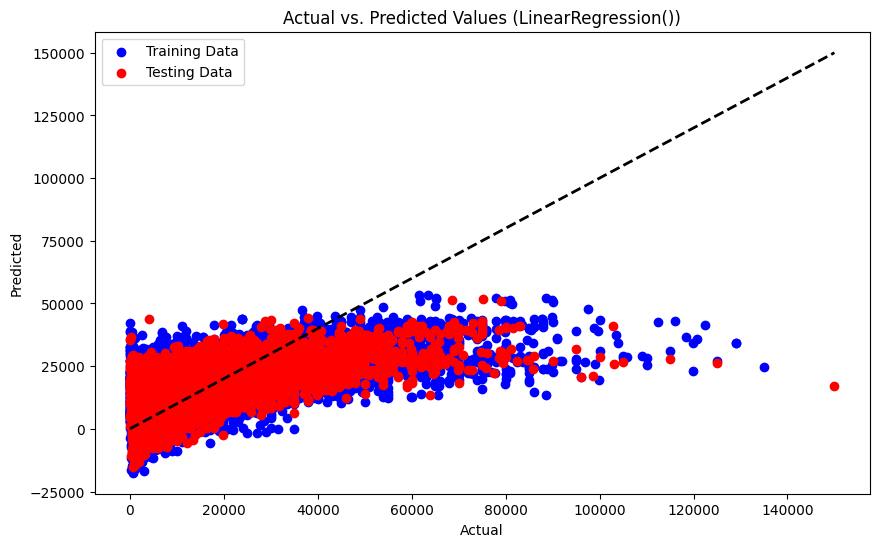

R2 Score of DecisionTreeRegressor() model on training data: 99.97664849840075
R2 Score of DecisionTreeRegressor() model on testing data: 54.30399133806927
RMSE of DecisionTreeRegressor() model on training data: 178.56295957001535
RMSE of DecisionTreeRegressor() model on testing data: 7856.718116482269


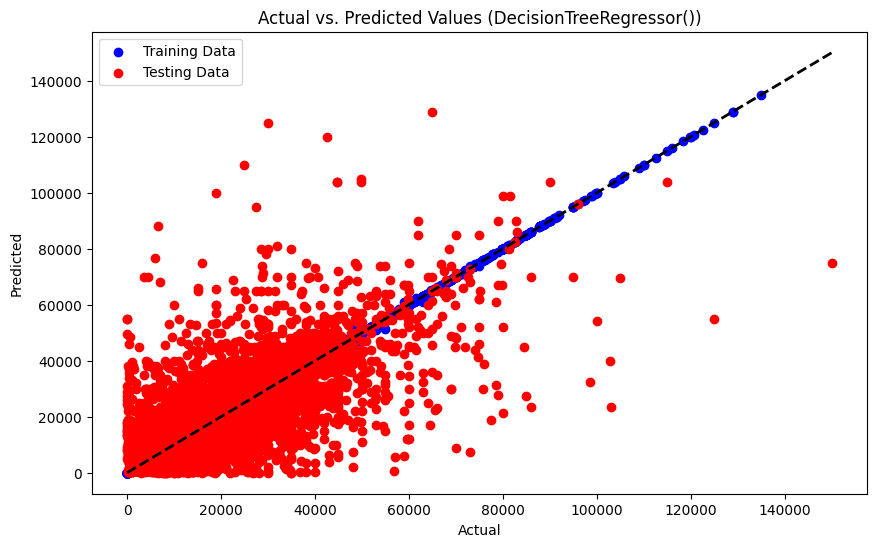

R2 Score of RandomForestRegressor() model on training data: 96.78451923546302
R2 Score of RandomForestRegressor() model on testing data: 76.1530578443901
RMSE of RandomForestRegressor() model on training data: 2095.351691805023
RMSE of RandomForestRegressor() model on testing data: 5675.686342601702


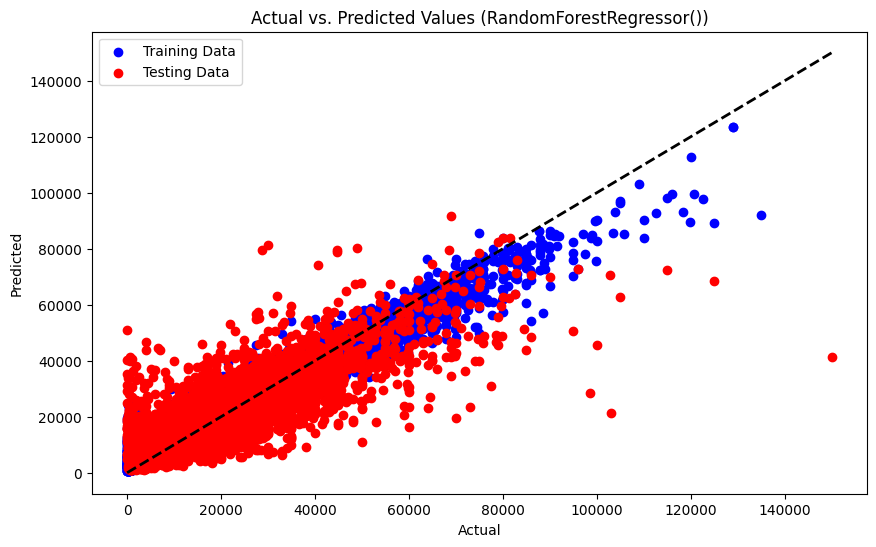

R2 Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on training data: 86.44031816852515
R2 Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rou

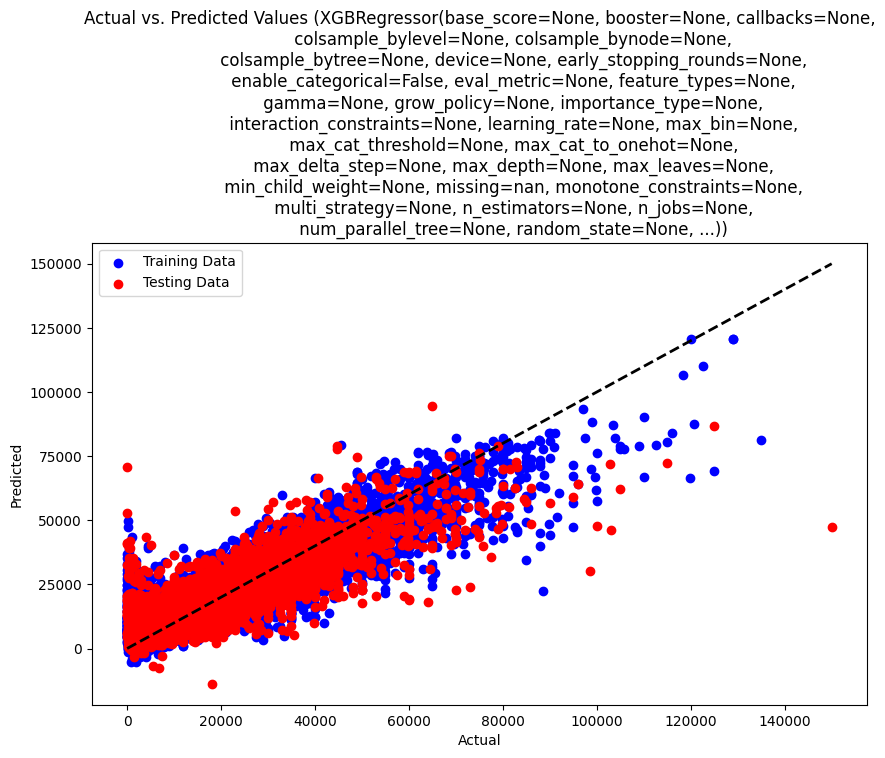

In [20]:
from xgboost import XGBRegressor
model_prediction1(LinearRegression())
model_prediction1(DecisionTreeRegressor())
model_prediction1(RandomForestRegressor())
model_prediction1(XGBRegressor())

In [21]:
models = ["Linear Regression","Decision Tree","Random Forest","XGBoost"]

In [22]:
training_r2_score


[49.6079006527418, 99.97664849840075, 96.78451923546302, 86.44031816852515]

In [23]:
testing_r2_score


[48.69373567389642, 54.30399133806927, 76.1530578443901, 79.52892313058516]

In [24]:
training_RMSE_score


[8294.97716634347, 178.56295957001535, 2095.351691805023, 4302.874889591527]

In [25]:
testing_RMSE_score

[8325.057367620422, 7856.718116482269, 5675.686342601702, 5258.62718595881]

In [26]:
model_df = pd.DataFrame({"Algorithm":models, "Training r2_Score":training_r2_score,"Testing r2_Score":testing_r2_score, "Training RMSE":training_RMSE_score, "Testing RMSE":testing_RMSE_score})
model_df

,Algorithm,Training r2_Score,Testing r2_Score,Training RMSE,Testing RMSE
0,Linear Regression,49.607901,48.693736,8294.977166,8325.057368
1,Decision Tree,99.976648,54.303991,178.562960,7856.718116
2,Random Forest,96.784519,76.153058,2095.351692,5675.686343
3,XGBoost,86.440318,79.528923,4302.874890,5258.627186


In [27]:
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import plotly


# Creating a figure with two subplots (horizontal bar charts)
fig = go.Figure()

# Add first subplot (horizontal bar chart for Testing Score)
fig.add_trace(
    go.Bar(
        y=model_df['Algorithm'],
        x=model_df['Testing r2_Score'],
        orientation='h',
        text=model_df['Testing r2_Score'],
        name='Testing Score',
        marker=dict(color='Green')  # Specify color for Testing Score bars
    )
)

# Add second subplot (horizontal bar chart for Training Score)
fig.add_trace(
    go.Bar(
        y=model_df['Algorithm'],
        x=model_df['Training r2_Score'],
        orientation='h',
        text=model_df['Training r2_Score'],
        name='Training Score',
        marker=dict(color='red')  # Specify color for Training Score bars
    )
)

# Update layout properties for the figure
fig.update_layout(
    title='Model Scores Comparison',
    barmode='group',  # Display bars side by side
    xaxis_title='Score',  # X-axis title
    yaxis_title='Algorithm',  # Y-axis title
    height=600,  # Set figure height
    width=800,   # Set figure width
    margin=dict(l=100, r=100, t=100, b=100),  # Set margins
    showlegend=True  # Show legend
)

# Show the combined figure with both subplots
fig.show()


In [31]:
#x_train.to_csv('external_test_data.csv', index=False)

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def model_prediction(model, x_train, y_train, x_test, y_test, external_data):
    # Train the model using training data (x_train, y_train)
    model.fit(x_train, y_train)
    
    # Make predictions on test data (x_test)
    y_pred_test = model.predict(x_test)
    
    # Evaluate the model on test data
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Make predictions on external data
    external_pred = model.predict(external_data)
    
    return external_pred, test_r2, test_rmse

# Load external data
external_data = pd.read_csv('ext.csv')

# Assuming x_train, y_train, x_test, y_test are defined

# Define the list of models to test
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('XGBoost', XGBRegressor()),
    ('Linear Regression', LinearRegression())
]

# List to store external data predictions for each model
external_data_predictions = []

# Loop through each model
for model_name, model in models:
    print(f"Testing {model_name} model...")
    
    # Create a new instance of the model
    model_instance = model
    
    # Use the model_prediction function to make predictions on external data
    external_pred, test_r2, test_rmse = model_prediction(model_instance, x_train, y_train, x_test, y_test, external_data)
    
    # Store the predictions along with the model name and evaluation metrics
    external_data_predictions.append((model_name, external_pred, test_r2, test_rmse))


# Display predictions and evaluation metrics for each model
for model_name, pred, test_r2, test_rmse in external_data_predictions:
    print(f"Predicted price using {model_name} model: {pred}")
    print(f"Test R2 Score: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")
    # Calculate Mean Squared Error (MSE)
    mse = test_rmse**2
    print(f"Test MSE: {mse:.4f}")


Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [7384.03]
Test R2 Score: 0.7611, Test RMSE: 5680.7945
Test MSE: 32271425.7548
Predicted price using Decision Tree model: [7500.]
Test R2 Score: 0.5394, Test RMSE: 7887.6238
Test MSE: 62214608.8963
Predicted price using XGBoost model: [6112.8633]
Test R2 Score: 0.7953, Test RMSE: 5258.6272
Test MSE: 27653159.8809
Predicted price using Linear Regression model: [12300.92835912]
Test R2 Score: 0.4869, Test RMSE: 8325.0574
Test MSE: 69306580.1742
